In [39]:
%%html
<style>
img{  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 90%;}
H2{text-align: center;
  font-weight: bold;
  }
</style>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json, urllib
from datetime import datetime, timedelta
import matplotlib.ticker as  mt
import xarray as xr
import plotly.graph_objects as go

The talk material is available here:
https://github.com/Boorhin/Talk_CPH_02_22/blob/main/CPH_talk_feb_22.ipynb

---

![logo](figures/logo_baneer.png)
# **Where is all the macroplastic in the ocean?** 
# **Oceanographic and sedimentological observations from NW Scotland**
## _Dr Julien Moreau_
---

![intro](figures/Intro_nature.png) [¹]
[¹][Lebreton et al., 2019, scientific report](https://www.nature.com/articles/s41598-019-49413-5)

## We are missing 99% of floating ocean plastic, where is it?
![travolta](figures/travolta.gif)

---

## But how do we measure the concentration of plastic in the ocean?
### Mostly we use trawl nets with very thin meshes. Plastic concentration measures are generally a by-product of oceanic plankton studies as they get caught in similar equipment
* Standard large plankton net
![plankton net](figures/plankton_net.jpg)
* More popular now, manta nets
![manta net](figures/manta_nets.jpg)


## Do you notice a limitation?
---

## Size matters ...
* Before the start of The Ocean Cleanup research most accounted plastic in the Great Pacific Garbage Patch was the *Plastic soup* 
* The combination of trawls, aerial surveys and GPS tagging of large debris started to show a totally different figure [¹]
![2 types of trawls](figures/difference_in_trawl_content.png)

### Bigger debris need a more *geoscientific* approach, aerial surveys [¹]
![aerial photos](figures/aerial_photographs.png)

---

## A very different pattern is emerging from the new surveying techniques

![cleanup stats](figures/ocean_cleanup_curves.png)

### Learnings:
* 50% of the mass of plastic in the GPGP is distributed in a non-linear way
* Fishing-aquaculture-shipping waste is a major contributor of pollution in the open ocean
* Plastic surveys not accounting for weight and mega-plastics **do not provide a realistic vision of ocean plastic pollution**

### Yet:
* The same kind of surveys are used over and over to establish the pollution situation based on counting items only and preferably in urban areas. Generally ignoring mega-plastics.
* Only very recently do we start to have some accounting on the industrial pollution resulting from offshore activities.

---


## So what is going on in NW Scotland?

![location](figures/location.png)

![demographic context](figures/density_europe.png)

## It is catastrophic...

![scouriemore](figures/scouriemore.png)

## Preliminary surveys and models in 2017 scared me
All the models are here => https://github.com/Boorhin/MarinePlasticTools

![word production](figures/world_production.png)

![local beaches](figures/local_beach_simulations.png)

## In fact the guys copied me in 2019 ;)
### The fancy way [Lebreton et al 2019 scientific reports](https://www.nature.com/articles/s41598-019-49413-5)
![the difference between a geophysicist and an oceanographer](figures/global_mass_balance.png)


---
## We decided to start Plastic@Bay CIC (www.plasticatbay.org)
### We use circular economy to fight and understand plastic pollution

![community cleans](figures/community_clean.jpg)

### We Monitor plastic pollution since April 2017 several times a week

![old_report](figures/old_bin_report.png)

## We can now demonstrate very similar results than in the GPGP
![conor surveys](figures/surveys_conor.png)

![GPGP data](figures/ocean_cleanup_curves.png)

In [2]:
def fractions(init, d):
    '''calculate the abscissa in year fractions'''
    year= d.year
    year1st= dt.datetime(year,1,1)
    span =dt.datetime(year+1,1,1)-year1st
    frac = (d-year1st)/span
    Ys= year-init
    return Ys+frac

## In 2020 we created our own citizen science portal
## www.plasticatbay.org/research
### We got beach cleaning group to record their data from remote areas that often are particularly polluted and would not be included in *official* databases
Here an example of the database

In [15]:
workdir='data/'
backup=workdir+'WeightData_27-12-21.json'
data = json.loads(open(backup).read())

In [5]:
print(data[2]['data'][0])

{'Id': '1235', 'RecordNb': '1', 'Beach': 'Ard Neackie', 'Lat': '58.4976', 'Longit': '-4.66321', 'Weight': '1000', 'Dates': '2018-11-28', 'team': 'Pentland Canoe Club', 'person': 'someemail'}


In [16]:
import pandas as pd
df=pd.json_normalize(data[2]['data'])
df['Weight']=df['Weight'].astype('float')
df

,Id,RecordNb,Beach,Lat,Longit,Weight,Dates,team,person
0,1235,1,Ard Neackie,58.4976,-4.66321,1000.00,2018-11-28,Pentland Canoe Club,someemail
1,4,0,Balnakeil,58.5802,-4.76575,500.00,2017-05-04,PlasticatBay,Julien
2,5,0,Balnakeil,58.5802,-4.76575,7.40,2017-05-08,PlasticatBay,Julien
3,6,0,Balnakeil,58.5802,-4.76575,6.40,2017-05-13,PlasticatBay,Julien
4,7,0,Balnakeil,58.5802,-4.76575,8.70,2017-05-21,PlasticatBay,Julien
...,...,...,...,...,...,...,...,...,...
5225,5387,0,Dunnet,58.6076,-3.35108,1.00,2021-12-02,Caithness Beach Cleans,Dorchas
5226,5388,0,Dunnet,58.6076,-3.35108,40.10,2021-12-02,Caithness Beach Cleans,Dorchas
5227,5389,0,Sandside,58.5635,-3.78514,4.54,2021-12-02,Caithness Beach Cleans,Dorchas
5228,5390,0,Balnakeil,58.5802,-4.76575,325.00,2021-12-17,PlasticatBay,julien.moreau@plasticatbay.org


In [17]:
grouped = df.groupby(['Beach', 'Lat', 'Longit'])[['Weight']].agg('sum').reset_index()
grouped

,Beach,Lat,Longit,Weight
0,Aberdaron,52.7879,-4.72866,67.00
1,Aberdeen,57.1529,-2.07748,288.90
2,Aberdovey,52.5415,-4.05465,24.00
3,Aberystwyth,52.4173,-4.08485,33.00
4,Aberyswyth,52.4173,-4.08485,2.50
...,...,...,...,...
557,Wyre Beach,53.9214,-3.00371,77.00
558,Wyre Estuary,53.9286,-3.00395,82.00
559,Yaverland,50.6617,-1.13394,61.00
560,castletown,58.5944,-3.37281,8.80


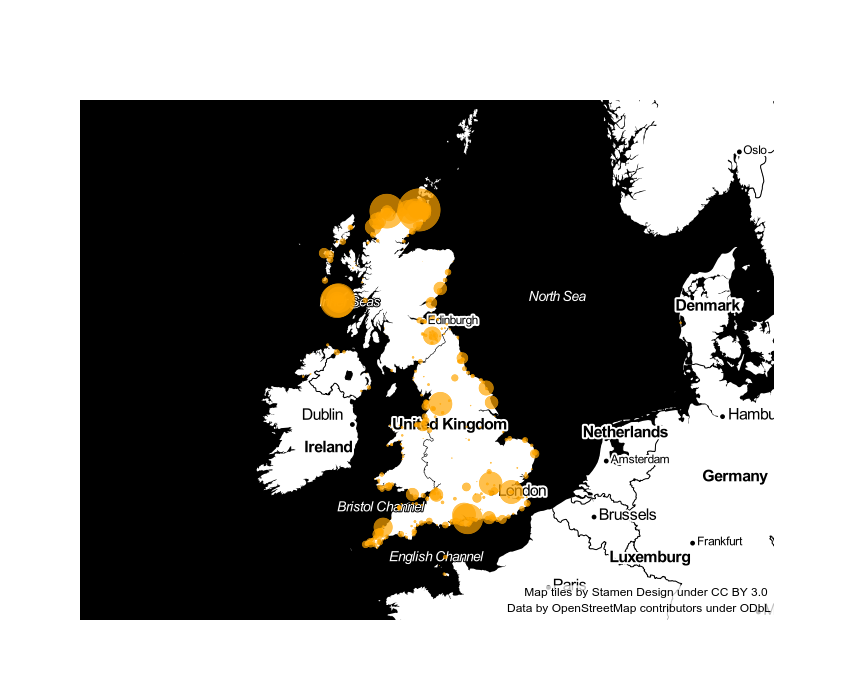

In [40]:
Plastic_map=go.Figure(
    go.Scattermapbox(lon=grouped['Longit'],
                     lat=grouped['Lat'], 
                     text=grouped['Beach'],                     
                     hovertemplate=
                    "<b>%{text}</b><br><br>" +
                    "Weight: %{marker.size:.2f}<br>",
                     marker=dict(
                            size=grouped['Weight'].values.astype('float'),
                            color='orange',
                            sizemode='area',
                            sizeref=10)),
                     
                    
                    
)
Plastic_map.update_layout(
    height=700,
    hovermode='closest',
    mapbox=dict(
                    bearing=0,
                    center=dict(
                        lat=55,
                        lon=-3,
                    ),
                    pitch=0,
                    zoom=4,
                    style="stamen-toner",)
)
Plastic_map.show()

## The most pollution recovered on beaches

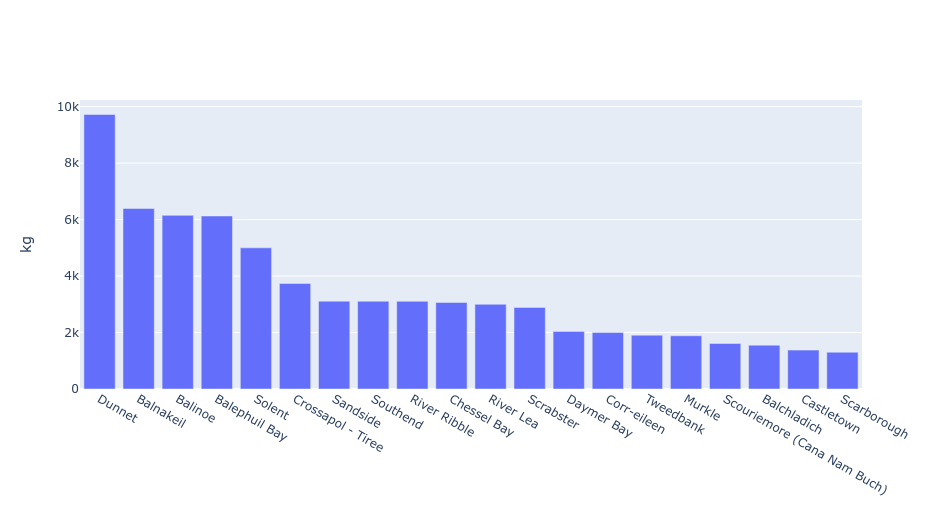

In [33]:
subdf=grouped.sort_values(by=['Weight'], ascending=False)[:20]
fig_nbcleans=go.Figure()
fig_nbcleans.add_trace(go.Bar(x=subdf['Beach'],
                              y=subdf['Weight']))
fig_nbcleans.update_layout(
    height=500,
    yaxis={'title':'kg'})

---

## Plastic pollution, a non-linear problem in constant acceleration

![rates of pollution](figures/rate_of_pollution.png)

---

## plastic pollution, a seasonal trigger
![polar plots season](figures/seasons.png)

---

## Hey wait! Is that reminding you of something?
### Sedimentological chaos maybe?
### A highly non-linear system that provides different behaviours to clast size classes shapes and compositions...

## Are macroplastics simply sediments?
![sediment_cap](figures/sediment_cap.png)

## Apparently, mega-plastics are and pretty annoying ones at that
### They are pretty big
![cutting](figures/cutting.gif)
### And they are pretty deep
![digging](figures/digging.gif)

It took 2 years to dig out this net, it was nearly 3m bellow the beach surface in 2018 when we started digging

---


## Based on our observations, we came up with a simple model
![model sedimento](figures/model.png)
### The take away message is that you cannot go in fairweather time and expect having a proper view of the pollution. Going in the summer at some exotic location will systematically return a very underestimated amount of plastic. 
* In the summer, we observe less than 1% of the yearly plastic accumulations.  
* In the summer we never observe base-level lowering of the beach profile
* Megaplastics mainly occur in the winter
---

## Plastic accumulation zones
### Coastal accumulation of plastic is challenged in a large part of the literature
### The main argument is that most of the plastic is in transit
### The kind of coastline surveyed
![longshore drift](figures/longshore_drift.jpeg)
### the whole system is transient and even
### We observe drastic changes from place to place with local increases of pollution by 1500% 

## Input from numerical models
![old model](figures/old_model.png)
### Clustering happens at sea

In [45]:
from IPython.display import Video
Video('https://video.wixstatic.com/video/f6b0cc_be3b6189e4cd417fad1fcb225e777ecd/720p/mp4/file.mp4', width=600)

## How does plastic accumulates for a long time in the coastal environment?
![matrix](figures/matrix.png)
### Onshore winds, strong tides and rugged coastline
![wind_tide model](figures/wind_tide_model.png)

---

## What next? 
* Make a better mass balance budget of the West Coast and Hebrides. Currently oscillating between 0.5 and 10 million tons of yearly accumulations from *back-of-the-envelop* calculations.
* Provide detailed numerical simulations of the accumulation phenomena to locate and remediate the areas the most at risk.
* Better investigate transport on the seabed, up to 50% of our plastics are denser than water
* We are also deeply involved in open-hardware for recycling these specific plastics but that would be for another talk!


---

## Thanks for your attention and thanks to our supporters and co-workers
In particular Joan, Ella, Roz, Tom Scanlon (MTS CFD), all our rangers and volunteers
![award](figures/award.jpg)

The talk material is available here:
https://github.com/Boorhin/Talk_CPH_02_22/blob/main/CPH_talk_feb_22.ipynb